# TRABALHO FINAL

> SEL0326 - CONTROLE DE SISTEMAS LINEARES

### Controle LQR de um modelo de Sistema de Potência Máquina versus Barramento Infinito

In [305]:
import numpy as np 
import matplotlib.pyplot as plt
import control.matlab as matlab
import seaborn as sns
sns.set_style("darkgrid")

* Espaço de eestados do sistema: 
$ \dot{x} = Ax + Bu $, $ \ x(0) = x_0$

## Etapa 1: Criação do modelo nominal do grupo 

$$
A = \begin{bmatrix}
0 & 376.9911 & 0 & 0 \\
-0.15685 & 0 & -0.0784 & 0 \\
-0.16725 & 0 & -0.46296 & 0.166667 \\
1572.825 & 0 & -5416.98 & -100 \\
\end{bmatrix}
$$

$$
B = \begin{bmatrix}
0 \\
0 \\
0 \\
100 \\
\end{bmatrix}
$$

In [306]:
# Matrix A
A = np.array([[0, 376.9911, 0, 0],
              [-0.15685, 0, -0.0784, 0],
              [-0.16725, 0, -0.46296, 0.166667],
              [1572.825, 0, -5416.98, -100]])

# Matrix B
B = np.array([[0],
              [0],
              [0],
              [10000]])

# Generate delta_A
delta_A = np.random.uniform(-0.05, 0.05, size=A.shape) * A

A = A + delta_A

A.shape, B.shape


((4, 4), (4, 1))

## Etapa 2: Definição do funcional LQR

O controle LQR (Linear Quadratic Regulator) é um tipo de controle ótimo que minimiza uma função de custo quadrática. O controlador LQR é projetado para estabilizar um sistema linear minimizando a função de custo:

$$J = \int_{0}^{\infty} (x^T Q x + u^T R u) dt$$

onde $x$ é o vetor de estado, $u$ é a entrada de controle, $Q$ é a matriz de ponderação do estado e $R$ é a matriz de ponderação do controle. O controlador LQR calcula a entrada de controle ótima $u^*$ que minimiza a função de custo.

O controlador LQR é projetado para estabilizar um sistema linear minimizando a função de custo. O controlador LQR calcula a entrada de controle ótima $u^*$ que minimiza a função de custo. A entrada de controle ótima é dada por:

$$u^* = -Kx$$

onde $K$ é a matriz de ganho LQR. A matriz de ganho LQR é calculada resolvendo a equação de Riccati algébrica:

$$A^T P + P A - P B R^{-1} B^T P + Q = 0$$

onde $P$ é a solução da equação de Riccati. A matriz de ganho LQR é então dada por:

$$K = R^{-1} B^T P$$

O controlador LQR é um controlador de realimentação de estado, o que significa que a entrada de controle é uma função do vetor de estado. O controlador LQR é ótimo no sentido de que minimiza a função de custo e estabiliza o sistema.

In [307]:
# Q e R matrizes diagonais e postivias

Q = np.diag([1, 1, 1, 1])
R = np.diag([1])

# obs: Q tem que ter a mesma dimensão de A (quadrada)

Q, R


(array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]]),
 array([[1]]))

To represent the matrices Q and R in LaTeX form, you can use the following notation:

$$
L = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

$$
Q = \begin{bmatrix}
1 
\end{bmatrix}
$$


## Etapa 3: Cálculo do ganho ótimo K para o modelo nominal do grupo

* Modelo: $ \dot{x} = (A + \Delta A) x + Bu $, $ \ x(0) = x_0$

* Realimentação: $ u = -Kx $

* Sistema em malha fechada: $ \dot{x} = (A + \Delta A - BK) x $

* Condição inicial: $x_0 = [0, 0, 0, 0.1] ^T $

a) calcule o ganho ótimo K que minimiza o funcional J

b) calcule o valor do funcional J para o ganho ótimo K obtido no item anterior e compare o valor calculado com o valor da expressão $x_0 ^T P x_0$

c) Apresente o gráfico da resposta no tempo do modelo com incertezas em malha fechada

In [308]:
# a) solve the algebraic Riccati equation to obtain the LQR gain matrix K
K, S, P = matlab.lqr(A, B, Q, R)

# create the closed-loop system with the LQR controller
Ac = A - B @ K

sys = matlab.ss(A, B, np.eye(4), 0)
sys_lqr = matlab.ss(Ac, B, np.eye(4), 0)

# print the LQR gain matrix
print(f"LQR gain matrix: {K}")

sys 

LQR gain matrix: [[ 0.57307793 -2.19174629  0.01005083  0.99015671]]


<LinearIOSystem:sys[2876]:['u[0]']->['y[0]', 'y[1]', 'y[2]', 'y[3]']>

In [309]:
# b) 
x0 = np.array([[0], [0], [0], [0.1]])

# simulate the system with the LQR controller
t = np.linspace(0, 5, 1000)
# calculate dt
dt = t[1] - t[0]
y, t, x = matlab.lsim(sys, 0 * t, t, x0)
ylqr, t, xlqr = matlab.lsim(sys_lqr, 0 * t, t, x0)

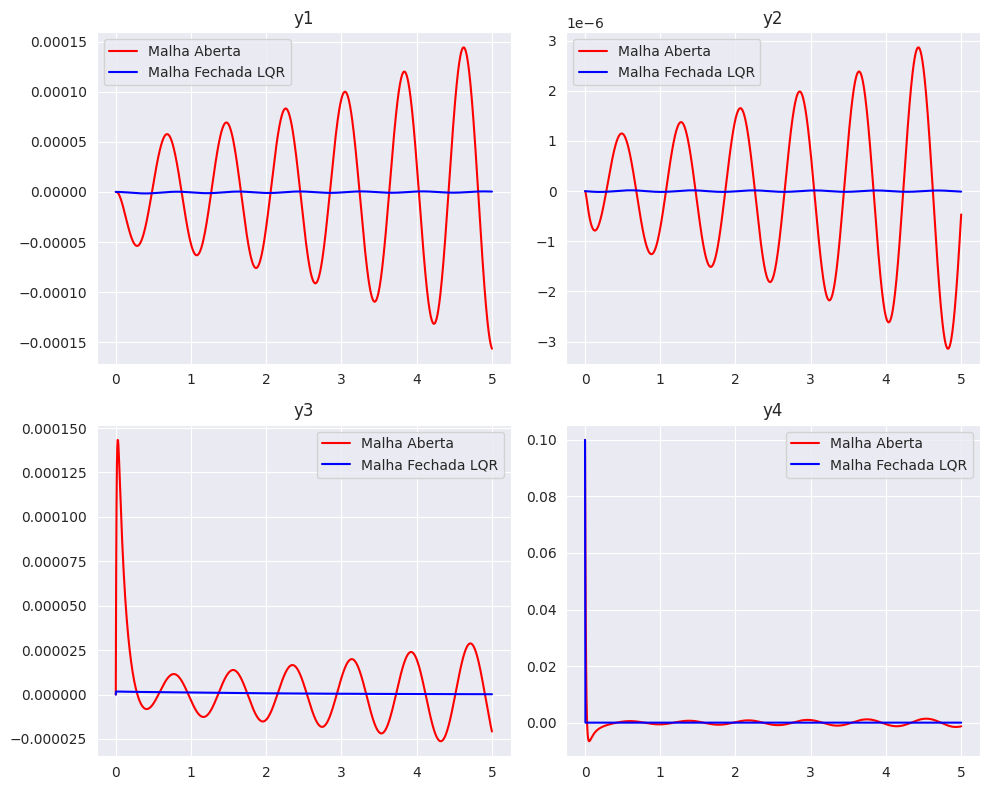

In [310]:
# c)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot y1 in the first subplot
axs[0, 0].plot(t, y[:, 0], label='Malha Aberta', color='red')
axs[0, 0].plot(t, ylqr[:, 0], label='Malha Fechada LQR', color='blue')
axs[0, 0].set_title('y1')

# Plot y2 in the second subplot
axs[0, 1].plot(t, y[:, 1], label='Malha Aberta', color='red')
axs[0, 1].plot(t, ylqr[:, 1], label='Malha Fechada LQR', color='blue')
axs[0, 1].set_title('y2')

# Plot y3 in the third subplot
axs[1, 0].plot(t, y[:, 2], label='Malha Aberta', color='red')
axs[1, 0].plot(t, ylqr[:, 2], label='Malha Fechada LQR', color='blue')
axs[1, 0].set_title('y3')

# Plot y4 in the fourth subplot
axs[1, 1].plot(t, y[:, 3], label='Malha Aberta', color='red')
axs[1, 1].plot(t, ylqr[:, 3], label='Malha Fechada LQR', color='blue')
axs[1, 1].set_title('y4')

# legend
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [311]:
# Calculate J
J = np.dot(np.dot(x0.T, S), x0)

# Print the value of J
print(f"The value of J is: {J}")

The value of J is: [[9.90156712e-07]]


In [312]:
# Calculate J (simulation)
ylqr = ylqr.T 
Ji_array = np.array([])  # Initialize an empty NumPy array to store the values of Ji

for j in range(len(ylqr)):
    Ji = ylqr[:, j].T @ Q @ ylqr[:, j] + (-K @ ylqr[:, j]).T @ R @ (-K @ ylqr[:, j])
    Ji_array = np.append(Ji_array, Ji)

print(np.trapz(Ji_array) * dt)


4.955981773143798e-05


## Etapa 4: Avaliação da otimalidade do controle fora das condições nominais

a) Realize agora 100 novos sorteios para os valores de $\Delta a_{ij}$ 

b) Utilizando simulações no tempo da resposta à condição inicial dada calcule valores aproximados do funcional J para o ganho ótimo K 

c) Apresente o histograma dos valores obtidos para o funcional J

d) Elabore uma conclusão a respeito do efeito das incertezas na matriz de estados sobre a otimalidade do controle LQR

In [313]:
# Set the maximum number of tests
MAX = 100

# Create an empty list to store the values of the functional J
Jp_list = []
Ji = np.array([]) 
Ji_array = np.array([])

# Loop through the number of tests
for i in range(MAX):
    # Generate new random values for delta_A
    delta_A = np.random.uniform(-0.05, 0.05, size=A.shape) * A
    
    # Update the matrix A with the new delta_A values
    A_new = A + delta_A
    
    # Perform the desired calculations or simulations using the updated A_new
    K, S, P = matlab.lqr(A_new, B, Q, R)

    # create the closed-loop system with the LQR controller
    Ac = A_new - B @ K
    sys_lqr = matlab.ss(A_new, B, np.eye(4), 0)

    # simulate the system with the LQR controller
    ylqr, t, xlqr = matlab.lsim(sys_lqr, 0 * t, t, x0)

    # Calculate J (thoery)
    J = np.dot(np.dot(x0.T, S), x0)

    # Calculate J (simulation)
    ylqr = ylqr.T 
    for j in range(len(ylqr)):
        Ji_temp = ylqr[:, j].T @ Q @ ylqr[:, j] + (-K @ ylqr[:, j]).T @ R @ (-K @ ylqr[:, j])
        Ji = np.append(Ji, Ji_temp)

    Ji_array = np.append(Ji_array, np.trapz(Ji) * dt)

    # Append the value of J to the list
    Jp_list.append(J)

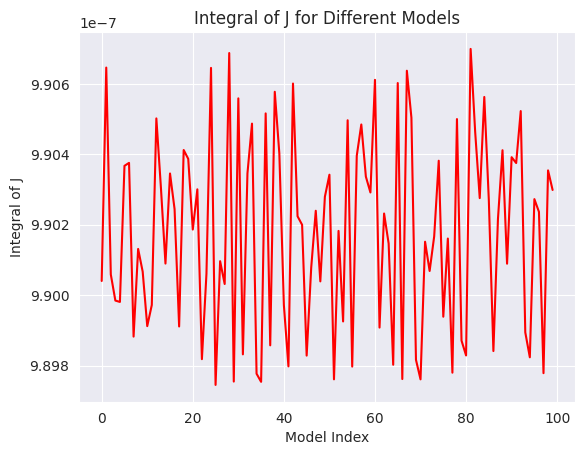

In [314]:
# Assuming functional_J_values is a list
functional_J_values = np.array(Jp).flatten()

# Create a list of model indices
model_indices = list(range(MAX))

# Plot the integral of J for each model
plt.plot(model_indices, functional_J_values, label='Integral of J', color='red')
plt.xlabel('Model Index')
plt.ylabel('Integral of J')
plt.title('Integral of J for Different Models')
plt.show()


In [315]:
# Variação entre max e min
ji_max = max(functional_J_values)
ji_min = min(functional_J_values)
var = (ji_max - ji_min) / ji_max * 100  # Calcula o quanto há de variação do Funcional J das iterações
v1 = abs(ji_min - J) / J * 100  # Quanto que o valor máximo do Funcional da iteração varia de J
v2 = abs(ji_max - J) / J * 100  # Quanto que o valor mínimo do Funcional da iteração varia de J
v_med = abs(np.mean(functional_J_values) - J) / J * 100  # Quanto que a média dos Funcionais obtidos na iteração varia de J

print(f'Valor mínimo: {ji_min*1e7:.2f}10^-7')
print(f'Valor máximo: {ji_max*1e7:.2f}10^-7')
print(f'Variação entre max e min: {var:.2f}%')
print(f'Variação do valor mínimo de J: {v1[0,0]:.2f}%')
print(f'Variação do valor máximo de J: {v2[0,0]:.2f}%')
print(f'Variação da média de J: {v_med[0,0]:.2f}%')

Valor mínimo: 9.9010^-7
Valor máximo: 9.9110^-7
Variação entre max e min: 0.10%
Variação do valor mínimo de J: 0.03%
Variação do valor máximo de J: 0.06%
Variação da média de J: 0.01%


## Extra

peso para Q (performance)

In [316]:
Q = np.diag([1, 1, 1, 0])
R = np.diag([1])

Q, R

(array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 0]]),
 array([[1]]))

In [317]:
K, S, P = matlab.lqr(A, B, Q, R)
Ac = A - B @ K

sys = matlab.ss(A, B, np.eye(4), 0)
sys_lqr = matlab.ss(Ac, B, np.eye(4), 0)

x0 = np.array([[0], [0], [0], [0.1]])

t = np.linspace(0, 5, 1000)
dt = t[1] - t[0]
y, t, x = matlab.lsim(sys, 0 * t, t, x0)
ylqr, t, xlqr = matlab.lsim(sys_lqr, 0 * t, t, x0)

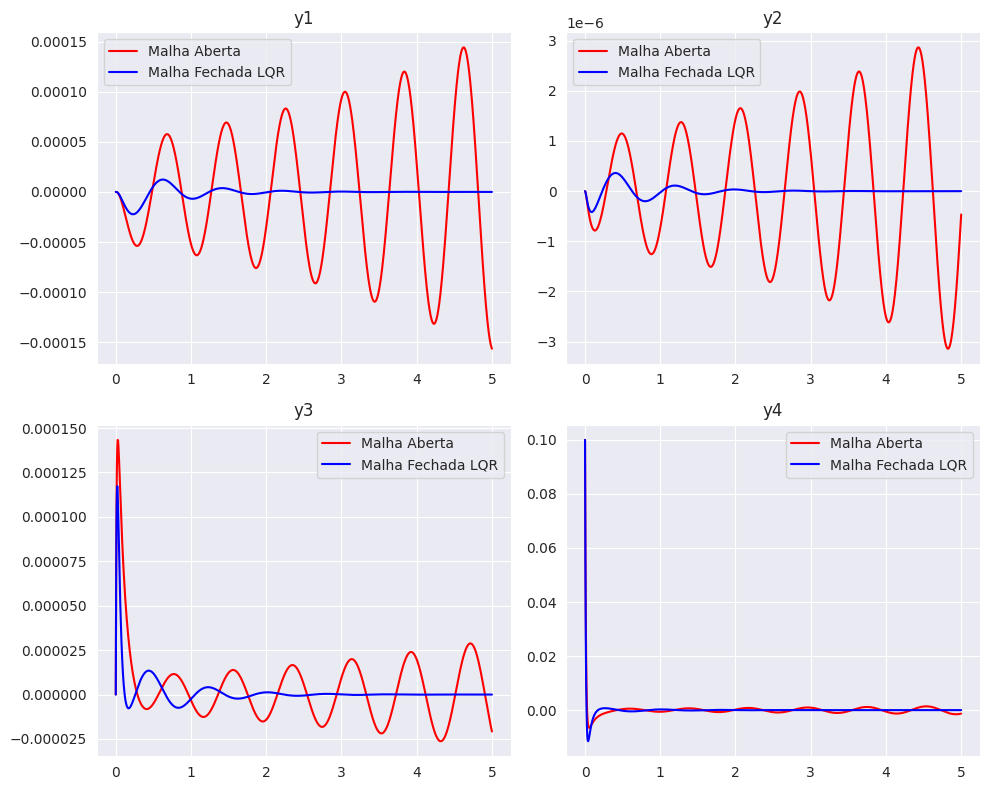

In [318]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot y1 in the first subplot
axs[0, 0].plot(t, y[:, 0], label='Malha Aberta', color='red')
axs[0, 0].plot(t, ylqr[:, 0], label='Malha Fechada LQR', color='blue')
axs[0, 0].set_title('y1')

# Plot y2 in the second subplot
axs[0, 1].plot(t, y[:, 1], label='Malha Aberta', color='red')
axs[0, 1].plot(t, ylqr[:, 1], label='Malha Fechada LQR', color='blue')
axs[0, 1].set_title('y2')

# Plot y3 in the third subplot
axs[1, 0].plot(t, y[:, 2], label='Malha Aberta', color='red')
axs[1, 0].plot(t, ylqr[:, 2], label='Malha Fechada LQR', color='blue')
axs[1, 0].set_title('y3')

# Plot y4 in the fourth subplot
axs[1, 1].plot(t, y[:, 3], label='Malha Aberta', color='red')
axs[1, 1].plot(t, ylqr[:, 3], label='Malha Fechada LQR', color='blue')
axs[1, 1].set_title('y4')

# legend
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
